In [77]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans 


In [78]:
#Loading dataset
import pandas as pd
data=pd.read_csv('EmployeeSalary.csv')
data

,ID,WorkingYears,Salary
0,ID01,1,800
1,ID02,2,750
2,ID03,10,1720
3,ID04,11,1500
4,ID05,3,780
...,...,...,...
57,ID58,6,900
58,ID59,20,2970
59,ID60,21,3210
60,ID61,22,3250


In [79]:
data

,ID,WorkingYears,Salary
0,ID01,1,800
1,ID02,2,750
2,ID03,10,1720
3,ID04,11,1500
4,ID05,3,780
...,...,...,...
57,ID58,6,900
58,ID59,20,2970
59,ID60,21,3210
60,ID61,22,3250


In [80]:
data.describe()

,WorkingYears,Salary
count,62.000000,62.000000
mean,13.032258,1963.548387
std,8.105792,988.237538
min,1.000000,750.000000
25%,6.000000,957.500000
50%,12.000000,1885.000000
75%,20.750000,2955.000000
max,29.000000,3710.000000


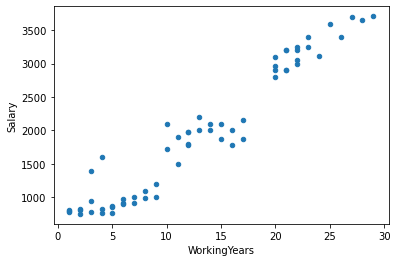

In [81]:
data.plot(kind='scatter', x='WorkingYears',y='Salary')
plt.show()

In [82]:
#Drop ID column, we don't use this column
df=data.drop(['ID'], axis=1)

In [83]:
df

,WorkingYears,Salary
0,1,800
1,2,750
2,10,1720
3,11,1500
4,3,780
...,...,...
57,6,900
58,20,2970
59,21,3210
60,22,3250


In [84]:
#Scaling the dataset
mms=MinMaxScaler()
mms.fit(df)
data_transformed=mms.transform(df)

In [85]:
data_transformed

array([[0.        , 0.01689189],
       [0.03571429, 0.        ],
       [0.32142857, 0.3277027 ],
       [0.35714286, 0.25337838],
       [0.07142857, 0.01013514],
       [0.10714286, 0.02702703],
       [0.39285714, 0.41554054],
       [0.42857143, 0.42567568],
       [0.14285714, 0.03378378],
       [0.17857143, 0.05405405],
       [0.21428571, 0.05743243],
       [0.25      , 0.08108108],
       [0.28571429, 0.08445946],
       [0.46428571, 0.4222973 ],
       [0.5       , 0.45608108],
       [0.53571429, 0.34797297],
       [0.57142857, 0.37837838],
       [0.        , 0.02027027],
       [0.32142857, 0.45608108],
       [0.35714286, 0.38851351],
       [0.39285714, 0.41216216],
       [0.42857143, 0.48986486],
       [0.46428571, 0.45608108],
       [0.03571429, 0.02027027],
       [0.07142857, 0.21959459],
       [0.10714286, 0.28716216],
       [0.57142857, 0.47297297],
       [0.67857143, 0.69256757],
       [0.71428571, 0.72972973],
       [0.75      , 0.76013514],
       [0.

In [86]:
#Convert to Dataframe
data_transformed=pd.DataFrame(data_transformed, columns=['WorkingYears','Salary'])
data_transformed

,WorkingYears,Salary
0,0.000000,0.016892
1,0.035714,0.000000
2,0.321429,0.327703
3,0.357143,0.253378
4,0.071429,0.010135
...,...,...
57,0.178571,0.050676
58,0.678571,0.750000
59,0.714286,0.831081
60,0.750000,0.844595


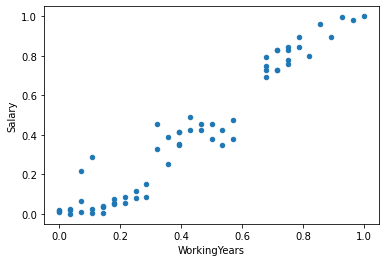

In [87]:
#Replotting dataset after scalling
data_transformed.plot(kind='scatter', x='WorkingYears',y='Salary')
plt.show()

In [88]:
#Elbow method to minimize WSS (Within-cluster Sum of Square)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

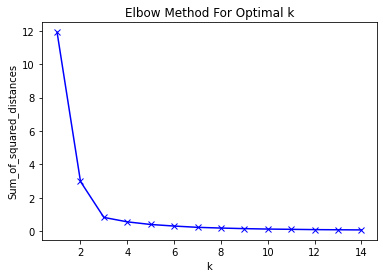

In [89]:
#Plotting the Elbow Curve 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [90]:
#Using K-Mean with k=3 to cluster for the dataset
data=pd.read_csv('EmployeeSalary.csv')
df=data.drop(['ID'], axis=1)

In [91]:
#Clustering the dataset with k=3
km3 = KMeans(n_clusters=3)
km3 = km3.fit(df)

In [92]:
print(km3.labels_)

[1 1 2 2 1 1 2 2 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 0 0 0 2 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 2]


In [93]:
labels=km3.labels_

In [94]:
labels=pd.DataFrame(labels, columns=['cluster'])

In [95]:
df_clustered=pd.concat([df,labels], axis=1)

In [96]:
df_clustered

,WorkingYears,Salary,cluster
0,1,800,1
1,2,750,1
2,10,1720,2
3,11,1500,2
4,3,780,1
...,...,...,...
57,6,900,1
58,20,2970,0
59,21,3210,0
60,22,3250,0


In [97]:
#how many observations are in each cluster
print(km3.labels_)
result=km3.labels_
result=pd.DataFrame(result, columns=['cluster'])
result.groupby('cluster').size()

[1 1 2 2 1 1 2 2 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 0 0 0 2 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 2]


cluster
0    20
1    23
2    19
dtype: int64

In [98]:
#The centroid of cluster
centroids = km3.cluster_centers_
centroids=pd.DataFrame(centroids, columns=['Centroid_Year', 'Centroid_Salary'])
centroids

,Centroid_Year,Centroid_Salary
0,22.850000,3217.000000
1,4.652174,912.173913
2,12.842105,1916.842105


In [99]:
#Predict clusters for 3 employees with WorkingYears and Salary as below
clu_pred=km3.predict([[18,3700],[4,900],[10,1700]])

In [100]:
#Show the results
clu_pred

array([0, 1, 2])

Text(0, 0.5, 'Salary')

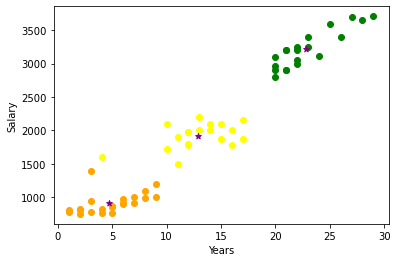

In [101]:
df1 = df_clustered[df_clustered.cluster==0]
df2 = df_clustered[df_clustered.cluster==1]
df3 = df_clustered[df_clustered.cluster==2]
plt.scatter(df1.WorkingYears,df1['Salary'],color='green')
plt.scatter(df2.WorkingYears,df2['Salary'],color='orange')
plt.scatter(df3.WorkingYears,df3['Salary'],color='yellow')
plt.scatter(centroids.Centroid_Year,centroids.Centroid_Salary,color='purple',marker='*',label='centroid')
plt.xlabel('Years')
plt.ylabel('Salary')